In [95]:
import pandas as pd
df = pd.read_csv('physics_experiment.csv')
df

time  time^2  displacement
0       0       0     -0.363828
1       1       1     20.671579
2       2       4     50.540124
3       3       9     90.597008
4       4      16    138.482108
..    ...     ...           ...
495    95    9025  45648.163295
496    96    9216  46599.477064
497    97    9409  47560.141768
498    98    9604  48529.743071
499    99    9801  49511.007612

[500 rows x 3 columns]

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# regress displacement vs. time
X = df.loc[:, ['time']].values
y = df['displacement'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.coef_)
print(model.intercept_)

0.9280431090317652
[505.76743205]
-8156.398830812228


<AxesSubplot:xlabel='time', ylabel='displacement'>

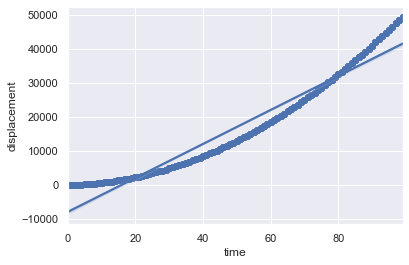

In [97]:
import seaborn as sns
sns.set()
sns.regplot(x='time', y='displacement', data=df)

In [98]:
X = df.loc[:, ['time', 'time^2']].values
y = df['displacement'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.coef_)
print(model.intercept_)

0.9999999946560748
[14.99460238  4.90003441]
0.1916566769250494


In [102]:
from sklearn.tree import DecisionTreeRegressor

rt = DecisionTreeRegressor(max_leaf_nodes=10)
rt.fit(X_train, y_train)
rt.score(X_test, y_test)

0.9837945650983736

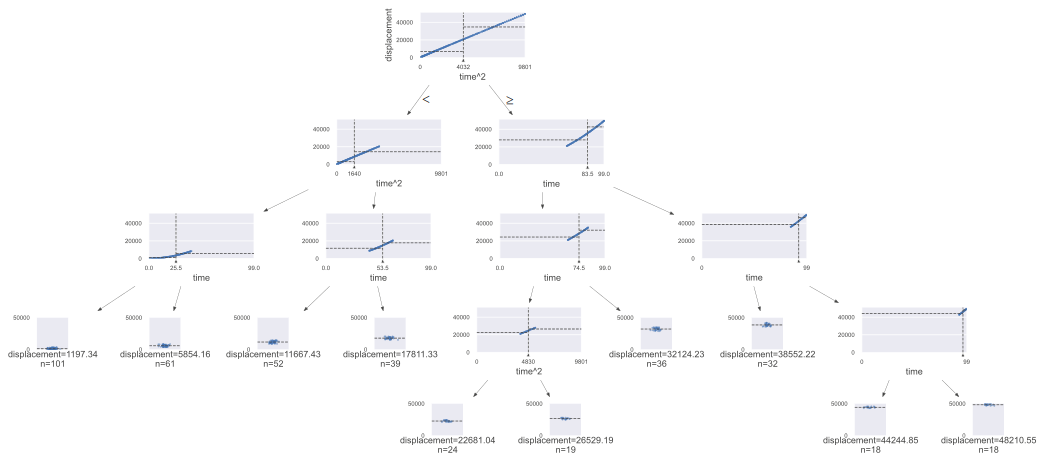

In [104]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(rt, X_train, y_train,
                target_name="displacement",
                feature_names=['time', 'time^2'])

viz

In [202]:
df = pd.read_csv('arjun_movie_preferences.csv')
df

minutes above 2 hours  rotten tomatoes score  comedy movie  \
0                        39                     14             1   
1                        45                     85             0   
2                         3                     88             0   
3                         5                     78             0   
4                         0                     28             0   
...                     ...                    ...           ...   
4995                      6                     18             0   
4996                     19                     41             0   
4997                     29                     73             1   
4998                     20                     72             1   
4999                     12                     59             1   

      period piece  horror movie  Arjun likes movie  
0                1             1                  0  
1                1             0                  0  
2                0             0                  1  
3                1             1                  1  
4                0             1                  0  
...            ...           ...                ...  
4995             0             0                  0  
4996             1             0                  0  
4997             0             0                  0  
4998             1             1                  1  
4999             1             1                  1  

[5000 rows x 6 columns]

In [195]:
X = df.loc[:, ['minutes above 2 hours', 'rotten tomatoes score']].values
y = df.loc[:, 'Arjun likes movie'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [196]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [197]:
gnb.score(X_test, y_test)

0.921

In [198]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

X = df.loc[:, df.columns != 'Arjun likes movie'].values
y = df.loc[:, 'Arjun likes movie'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the model with data
logreg.fit(X_train,y_train)

logreg.score(X_test, y_test)

0.994

In [199]:
logreg.coef_

array([[-0.60689583,  0.51105607,  5.13184537,  6.17988869, -5.07244408]])

In [200]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_leaf_nodes=20)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.941

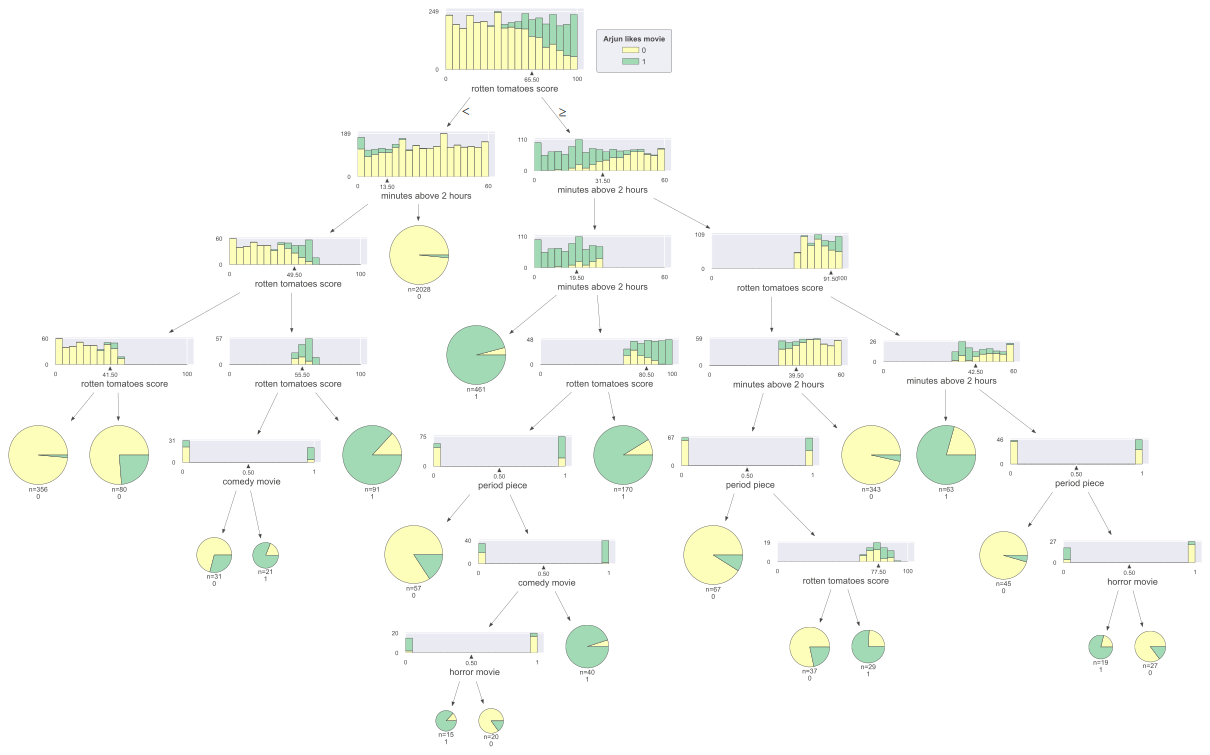

In [201]:
viz = dtreeviz(dt, X_train, y_train,
                target_name="Arjun likes movie",
                feature_names=['minutes above 2 hours',
                               'rotten tomatoes score',
                               'comedy movie', 'period piece',
                               'horror movie'],
                class_names=[0, 1])

viz